In [13]:
import numpy as np
import matplotlib.pyplot as plt
import time

[0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.        +0.j         0.        +0.j         0.        +0.j
 0.     

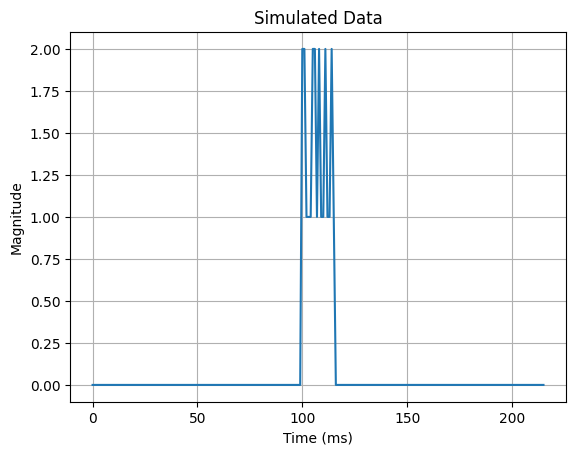

Original Message:
[1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0.]
Decoded Message:
[1. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0.]
Percent Error:
0.0%
Demodulation Time:
389 μs


In [14]:
n = 16 #length of message (packet)
f = 5e6 #message/sample frequency (Hz)
#periods per bit always 1

M = np.round(np.random.random(n)) #generating message (random sequence of bits)

# x = np.zeros(int(np.random.uniform(0.5,1)*n)) #leading floor
x = np.zeros(100) #leading floor

x = np.append(x,(M+1)*np.exp(1j*2*np.pi*np.random.rand()))
# x = np.append(x,np.zeros(int(np.random.uniform(0.5,1)*n))) #trailing floor
x = np.append(x,np.zeros(int(100))) #trailing floor

# std = 0.01 #standard deviation of noise (0 for no noise)
# x += (np.random.normal(0,std,len(x))+1j*np.random.normal(0,std,len(x))) #adding noise

print(x)

plt.plot(np.abs(x))
plt.title("Simulated Data")
plt.xlabel("Time (ms)")
plt.ylabel("Magnitude")
plt.grid(True)
plt.show()

t0 = time.time()

#demodulation
L = np.abs(x[np.abs(x)>0.5])
L = np.piecewise(L,[L>=1.5,L<1.5],[1,0])

t1 = time.time()

print("Original Message:")
print(M)
print("Decoded Message:")
print(L)
print("Percent Error:")
print(str(np.round(np.average(np.abs(M-L))*100,3))+'%')
print("Demodulation Time:")
print(str(int((t1-t0)*1e6))+' μs')